## Importing Weather Data

In [149]:
# Import 3rd party libraries, os (directory services), pandas (data manipulation), seaborn and matplotlib (for visualization)
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [332]:
#to work with the compiled data-frame for all 4 months
YTZ_weather = pd.read_csv('src/Weather Data/YTZ_weather.csv')

In [333]:
# Localize to time-stamp 
YTZ_weather['datetime_EST'] = pd.to_datetime(YTZ_weather['Date/Time (LST)'])
YTZ_weather = YTZ_weather.set_index(['datetime_EST'])
YTZ_weather.index = (YTZ_weather.index).tz_localize('EST')
YTZ_weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
datetime_EST,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 00:00,2022,1,1,00:00,4.6,...,NaN,NaN,NaN,99.37,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 01:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 01:00,2022,1,1,01:00,4.7,...,NaN,NaN,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 02:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 02:00,2022,1,1,02:00,4.7,...,NaN,NaN,NaN,99.17,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 03:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 03:00,2022,1,1,03:00,4.8,...,NaN,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 04:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 04:00,2022,1,1,04:00,4.8,...,NaN,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN


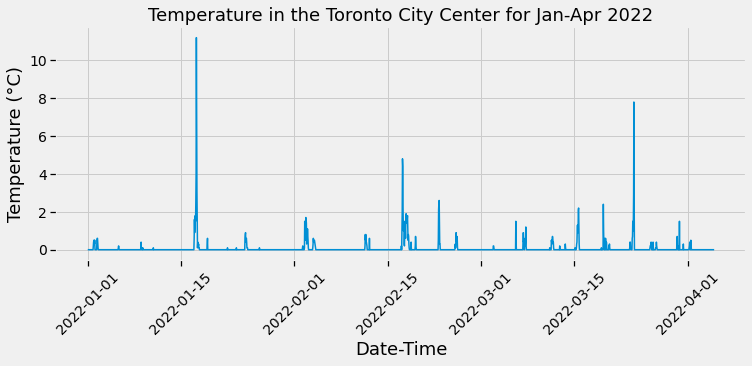

In [334]:
#Amount of snowfall over 4-month period
plt.figure(figsize=(11, 4))
plt.title('Temperature in the Toronto City Center for Jan-Apr 2022', fontsize=18)
ax = sns.lineplot(data=YTZ_weather, x='datetime_EST', y='Precip. Amount (mm)')

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Date-Time', fontsize=18)
ax.set_ylabel('Temperature (°C)', fontsize=18)
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='Temp (°C)', ylabel='Density'>

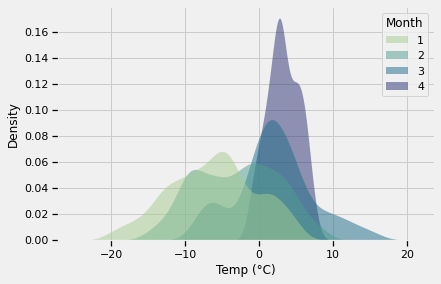

In [315]:
#visualize temperature distribution over 4 months
sns.kdeplot(
   data=YTZ_weather, x="Temp (°C)", hue="Month",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

## Create Separate Dataframes for Each Storm Event

In [ ]:
#separate dataframes will be created for each event
jan_storm_start = '2022-01-16 15:00'
jan_storm_end = '2022-01-19 19:00'

feb_storm1_start = '2022-02-02 03:00'
feb_storm1_end = '2022-02-03 03:00'

feb_storm2_start = '2022-02-16 23:00'
feb_storm2_end = '2022-02-19 09:00'


jan_storm_merge = merge[(merge['Date/Time (LST)']>= jan_storm_start) 
                      & (merge['Date/Time (LST)']<= jan_storm_end)]

feb_first_storm_merge = merge[(merge['Date/Time (LST)']>= feb_storm1_start) 
                      & (merge['Date/Time (LST)']<= feb_storm1_end)]


feb_second_storm_merge = merge[(merge['Date/Time (LST)']>= feb_storm2_start) 
                      & (merge['Date/Time (LST)']<= feb_storm2_end)]

## Merge Weather Data with Polarity

In [270]:
#introduce mentions_df, defined in Twitter Pipeline earlier
mentions_df = pd.read_csv('src/Twitter Data/mentions_polarity.csv')
mentions_df.head()

,id,created_at,favorite_count,retweet_count,text,entities,screen_name,datetime_utc,datetime_est,text_no_punc,polarity,datetime_rounded,final_polarity
0,1.509200e+18,2022-03-30 16:00:35+00:00,0,0,"rt @to_winterops: expressways, major roads, re...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_Transport,2022-03-30 16:00:35+00:00,2022-03-30 12:00:35-04:00,rt to winterops expressways major roads re...,0.0,2022-03-30 12:00:00-04:00,Neutral
1,1.509190e+18,2022-03-30 15:39:56+00:00,0,0,@311toronto @indiaintoronto @to_winterops awai...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",Nanusanghvi,2022-03-30 15:39:56+00:00,2022-03-30 11:39:56-04:00,311toronto indiaintoronto to winterops awai...,-1.2,2022-03-30 12:00:00-04:00,Negative
2,1.508850e+18,2022-03-29 16:52:47+00:00,0,0,@cath_devries this was the one major storm we ...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",JohnMcKellar2,2022-03-29 16:52:47+00:00,2022-03-29 12:52:47-04:00,cath devries this was the one major storm we ...,-2.1,2022-03-29 13:00:00-04:00,Negative
3,1.508180e+18,2022-03-27 20:18:04+00:00,0,0,"rt @to_winterops: all expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",midweekcycling,2022-03-27 20:18:04+00:00,2022-03-27 16:18:04-04:00,rt to winterops all expressways main roads ...,0.0,2022-03-27 16:00:00-04:00,Neutral
4,1.508110e+18,2022-03-27 15:47:58+00:00,0,0,"rt @to_winterops: all expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TPSAux14Div,2022-03-27 15:47:58+00:00,2022-03-27 11:47:58-04:00,rt to winterops all expressways main roads ...,0.0,2022-03-27 12:00:00-04:00,Neutral


In [271]:
#mentions_df will be merged with YTZ_weather, using the date-time values
# a key column will be created using only the date-time (without localization)

mentions_df['key'] = ((mentions_df['datetime_rounded']).astype(str)).str[:19]
YTZ_weather['key']=((YTZ_weather.index).astype(str)).str[:19]

merge=pd.merge(YTZ_weather,mentions_df, how='outer', left_on = 'key', right_on='key')
merge.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,retweet_count,text,entities,screen_name,datetime_utc,datetime_est,text_no_punc,polarity,datetime_rounded,final_polarity
0,-79.4,43.67,TORONTO CITY,6158355.0,2022-01-01 00:00,2022.0,1.0,1.0,00:00,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.67,TORONTO CITY,6158355.0,2022-01-01 01:00,2022.0,1.0,1.0,01:00,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.67,TORONTO CITY,6158355.0,2022-01-01 02:00,2022.0,1.0,1.0,02:00,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.67,TORONTO CITY,6158355.0,2022-01-01 03:00,2022.0,1.0,1.0,03:00,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.67,TORONTO CITY,6158355.0,2022-01-01 04:00,2022.0,1.0,1.0,04:00,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
merge['Month-Day-Time'] = ((merge['Date/Time (LST)']).astype(str)).str[8:16]
merge.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,text,entities,screen_name,datetime_utc,datetime_est,text_no_punc,polarity,datetime_rounded,final_polarity,Month-Day-Time
0,-79.4,43.67,TORONTO CITY,6158355.0,2022-01-01 00:00,2022.0,1.0,1.0,00:00,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 00:00
1,-79.4,43.67,TORONTO CITY,6158355.0,2022-01-01 01:00,2022.0,1.0,1.0,01:00,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 01:00
2,-79.4,43.67,TORONTO CITY,6158355.0,2022-01-01 02:00,2022.0,1.0,1.0,02:00,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 02:00
3,-79.4,43.67,TORONTO CITY,6158355.0,2022-01-01 03:00,2022.0,1.0,1.0,03:00,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 03:00
4,-79.4,43.67,TORONTO CITY,6158355.0,2022-01-01 04:00,2022.0,1.0,1.0,04:00,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 04:00


In [273]:
#save this combined weather and polarity csv
merge.to_csv('weather_polarity_combined.csv')

## Create Separate Dataframes for Each Storm Event

In [287]:
#separate dataframes will be created for each event
jan_storm_start = '2022-01-16 15:00'
jan_storm_end = '2022-01-19 19:00'

feb_storm1_start = '2022-02-02 03:00'
feb_storm1_end = '2022-02-03 03:00'

feb_storm2_start = '2022-02-16 23:00'
feb_storm2_end = '2022-02-19 09:00'


jan_storm_merge = merge[(merge['Date/Time (LST)']>= jan_storm_start) 
                      & (merge['Date/Time (LST)']<= jan_storm_end)]

feb_first_storm_merge = merge[(merge['Date/Time (LST)']>= feb_storm1_start) 
                      & (merge['Date/Time (LST)']<= feb_storm1_end)]


feb_second_storm_merge = merge[(merge['Date/Time (LST)']>= feb_storm2_start) 
                      & (merge['Date/Time (LST)']<= feb_storm2_end)]

In [276]:
#test that code above worked
feb_first_storm_merge.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,text,entities,screen_name,datetime_utc,datetime_est,text_no_punc,polarity,datetime_rounded,final_polarity,Month-Day-Time
1262,-79.4,43.67,TORONTO CITY,6158355.0,2022-02-02 03:00,2022.0,2.0,2.0,03:00,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02 03:00
1263,-79.4,43.67,TORONTO CITY,6158355.0,2022-02-02 04:00,2022.0,2.0,2.0,04:00,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02 04:00
1264,-79.4,43.67,TORONTO CITY,6158355.0,2022-02-02 05:00,2022.0,2.0,2.0,05:00,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02 05:00
1265,-79.4,43.67,TORONTO CITY,6158355.0,2022-02-02 06:00,2022.0,2.0,2.0,06:00,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02 06:00
1266,-79.4,43.67,TORONTO CITY,6158355.0,2022-02-02 07:00,2022.0,2.0,2.0,07:00,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02 07:00


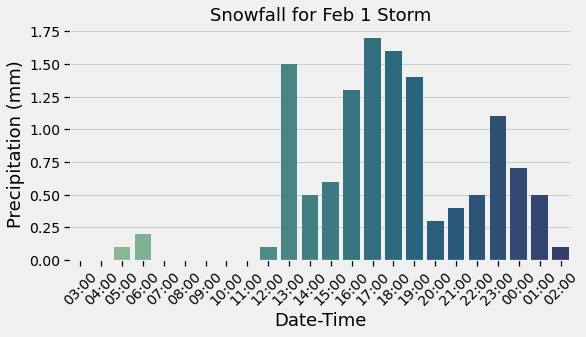

In [277]:
#Total amount of snowfall can be plotted for each storm - example: 1st February storm
plt.figure(figsize=(8, 4))

plt.title('Snowfall for Feb 1 Storm', fontsize=18)
ax = sns.barplot(data=feb_first_storm_merge, x='Time (LST)', y='Precip. Amount (mm)',palette="crest")

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Date-Time', fontsize=18)
ax.set_ylabel('Precipitation (mm)', fontsize=18)
plt.xticks(rotation = 45)
plt.show()

In [278]:
# a new column will be added to the large merge frame to mark the storm events
YTZ_weather['Storm Number'] = YTZ_weather['Date/Time (LST)'].apply(lambda x: 'Jan Storm' if pd.to_datetime(x) >= pd.to_datetime(jan_storm_start) and pd.to_datetime(x) <= pd.to_datetime(jan_storm_end)
                                                       else ('1st Feb Storm' if pd.to_datetime(x) >= pd.to_datetime(feb_storm1_start) and pd.to_datetime(x) <= pd.to_datetime(feb_storm1_end) 
                                                             else ('2nd Feb Storm' if pd.to_datetime(x) >= pd.to_datetime(feb_storm2_start) and pd.to_datetime(x) <= pd.to_datetime(feb_storm2_end) 
                                                                   else '')))


merge['Storm Number'] = merge['Date/Time (LST)'].apply(lambda x: 'Jan Storm' if pd.to_datetime(x) >= pd.to_datetime(jan_storm_start) and pd.to_datetime(x) <= pd.to_datetime(jan_storm_end)
                                                       else ('1st Feb Storm' if pd.to_datetime(x) >= pd.to_datetime(feb_storm1_start) and pd.to_datetime(x) <= pd.to_datetime(feb_storm1_end) 
                                                             else ('2nd Feb Storm' if pd.to_datetime(x) >= pd.to_datetime(feb_storm2_start) and pd.to_datetime(x) <= pd.to_datetime(feb_storm2_end) 
                                                                   else '')))

In [279]:
merge['Storm Number'].value_counts()

                 3221
Jan Storm         119
2nd Feb Storm      72
1st Feb Storm      37
Name: Storm Number, dtype: int64

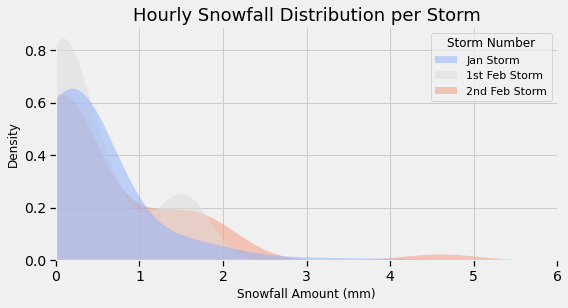

In [280]:
#filter dataframe to storms only for snowfall distribution
storms = merge[merge['Storm Number']!='']

plt.figure(figsize=(8, 4))
plt.title('Hourly Snowfall Distribution per Storm', fontsize=18)

ax = sns.kdeplot(
   data=storms, x='Precip. Amount (mm)', hue="Storm Number",
   fill=True, common_norm=False, palette="coolwarm",
   alpha=.5, linewidth=0, clip=(0.0, 6.0)
)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Snowfall Amount (mm)', fontsize=12)
ax.set_xlim(0,6)


plt.show()
#Storm 1 (Jan) and Storm 3 (2nd Feb storm) are most similar

In [281]:
jan_feb_merge = merge[(merge['Date/Time (LST)']<='2022-03-01 00:00')]

## Generate Plots Comparing Weather and Polarity

In [282]:
import numpy as np

## January Storm - Weather vs Polarity Trends

In [320]:
jan_storm_merge['final_polarity'].value_counts()

200

In [317]:
jan_storm_merge['day-time'] = (jan_storm_merge['Date/Time (LST)'].astype(str)).str[8:19]
data = jan_storm_merge.groupby('day-time')['polarity'].sum()

pal = sns.color_palette("YlOrRd", len(data))
rank = data.argsort().argsort()  

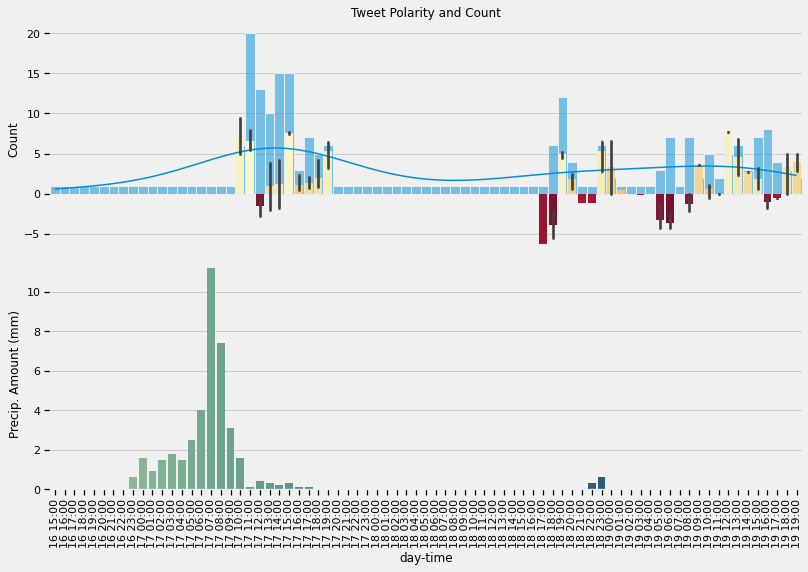

In [319]:
fig, axs = plt.subplots(nrows=2, figsize=(12, 8),sharex=True)


sns.histplot(
    x='day-time',
    data=jan_storm_merge,
    palette="flare",
    ax=axs[0],
    kde=True
)

sns.histplot(
    x='datetime_est',
    data=df_jan,
    color="red",
    ax=axs[0],
    kde=True
)

axs[0].xaxis.set_visible(False)
axs[0].set_title("Tweet Polarity and Count")

norm = plt.Normalize(jan_storm_merge.polarity.min(), jan_storm_merge.polarity.max())
cmap = plt.get_cmap("magma")

sns.barplot(
    x='day-time',
    y='polarity',
    data=jan_storm_merge,
    palette=np.array(pal[::-1])[rank],
    capsize=.2,
    ax=axs[0]
)

axs[0].set_ylabel('Count')


sns.barplot(
    x='day-time',
    y='Precip. Amount (mm)',
    data=jan_storm_merge,
    ax=axs[1],
    palette = 'crest'
)

plt.xticks(rotation = 90)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.01)

In [307]:
print("Most negative tweets for January storm:")
for text in jan_storm_merge.sort_values('polarity').head()['text']:
    print('\n  ', text)

Most negative tweets for January storm:

   @ostrawczy @to_winterops i know.   no plows.  i checked.

   @to_winterops @311toronto @cityoftoronto snow plow just went thru my neighborhood (pine point etobicoke) for 10 min… https://t.co/vlsafkjokm

   @to_winterops @311toronto some are being missed, plow drivers are too stupid and lazy to realize people can't leave… https://t.co/kfrmputf1g

   @311toronto @lizabutcher @to_winterops however it doesn't mean they do anything, it just means they did a drive-by… https://t.co/ekehfdyqxj

   @johntory @cityoftoronto @to_transport snow storm condition should have been declared earlier as weather forecast w… https://t.co/2c8sysqd3q


## Second February Storm: Feb 16 23:00 to Feb 19 09:00

In [293]:
feb_second_storm_merge['day-time'] = (feb_second_storm_merge['Date/Time (LST)'].astype(str)).str[8:19]
feb_second_storm_merge.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,entities,screen_name,datetime_utc,datetime_est,text_no_punc,polarity,datetime_rounded,final_polarity,Month-Day-Time,day-time
1655,-79.4,43.67,TORONTO CITY,6158355.0,2022-02-16 23:00,2022.0,2.0,16.0,23:00,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16 23:00,16 23:00
1656,-79.4,43.67,TORONTO CITY,6158355.0,2022-02-17 00:00,2022.0,2.0,17.0,00:00,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 00:00,17 00:00
1657,-79.4,43.67,TORONTO CITY,6158355.0,2022-02-17 01:00,2022.0,2.0,17.0,01:00,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 01:00,17 01:00
1658,-79.4,43.67,TORONTO CITY,6158355.0,2022-02-17 02:00,2022.0,2.0,17.0,02:00,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 02:00,17 02:00
1659,-79.4,43.67,TORONTO CITY,6158355.0,2022-02-17 03:00,2022.0,2.0,17.0,03:00,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 03:00,17 03:00


In [294]:
feb_second_storm_merge['final_polarity'].value_counts()

Postive     18
Neutral      7
Negative     7
Name: final_polarity, dtype: int64

In [313]:
data = feb_second_storm_merge.groupby('final_polarity')['polarity'].sum()

pal = sns.color_palette("YlOrRd", len(data)*5)
rank = data.argsort().argsort() 

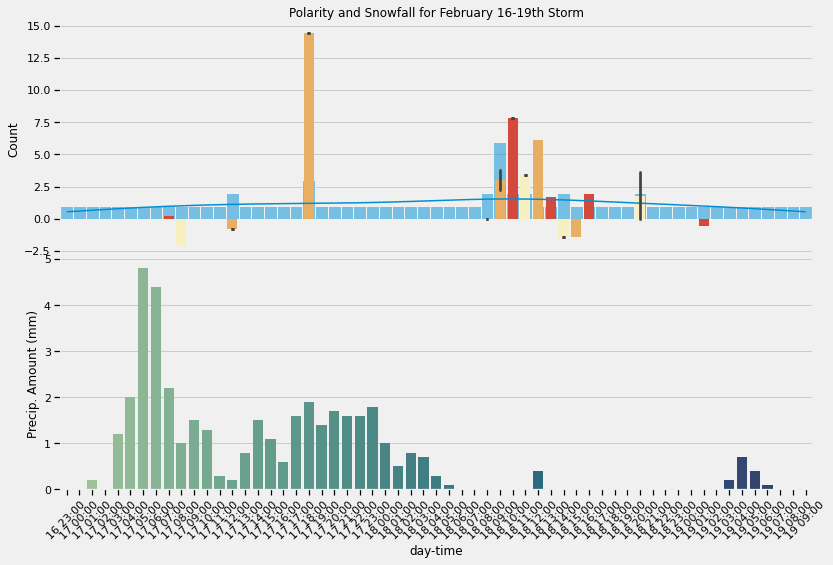

In [314]:
fig, axs = plt.subplots(nrows=2, figsize=(12, 8),sharex=True)


sns.histplot(
    x='day-time',
    data=feb_second_storm_merge,
    palette="flare",
    ax=axs[0],
    kde=True
)

axs[0].xaxis.set_visible(False)
axs[0].set_title("Polarity and Snowfall for February 16-19th Storm")

norm = plt.Normalize(feb_second_storm_merge.polarity.min(), feb_second_storm_merge.polarity.max())
cmap = plt.get_cmap("magma")

sns.barplot(
    x='day-time',
    y='polarity',
    data=feb_second_storm_merge,
    palette=np.array(pal[::5])[rank],
    capsize=.2,
    ax=axs[0]
)

axs[0].set_ylabel('Count')
axs[1].set_ylabel('Tweet Polarity')

sns.barplot(
    x='day-time',
    y='Precip. Amount (mm)',
    data=feb_second_storm_merge,
    ax=axs[1],
    palette='crest'
)

plt.xticks(rotation = 45)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.01)

In [308]:
print("Most negative tweets for 2nd February storm:")
for text in feb_second_storm_merge.sort_values('polarity').head()['text']:
    print('\n  ', text)

Most negative tweets for 2nd February storm:

   @markhmills @jilltaylorcity @citynatasha @citynews680 @cp24breakfast @johntory @to_winterops don't neglect sidewalk… https://t.co/e21ikdcwcj

   rt @to_winterops: plow operators may have difficulty seeing pedestrians or vehicles especially in snowy conditions.  be aware of your surro…

   @to_winterops @311toronto “difficulty seeing pedestrians” … explains why a speeding snow plow chucked dirty snow on… https://t.co/s8p8hgjr1n

   @to_winterops @311toronto i hope the plow operators will also be aware of their surroundings

   rt @to_winterops: #cityofto freezing rain &amp; snow are expected today into early fri with up to 10cm of snow accumulation. if you normally dr…


In [299]:
average = feb_second_storm_merge['polarity'].mean()
average

2.7718749999999996

## Final Statistics between January and 2nd February Event

In [327]:
#January Storm Statistics:
print('Total total tweets during January storm: ', jan_storm_merge['final_polarity'].count())
print('Breakdown of tweets:\n',jan_storm_merge['final_polarity'].value_counts())

#2nd February Storm Statistics:
print('\nTotal total tweets during 2nd February storm: ', feb_second_storm_merge['final_polarity'].count())
print('Breakdown of tweets:\n',  feb_second_storm_merge['final_polarity'].value_counts())

Total total tweets during January storm:  200
Breakdown of tweets:
 Postive     123
Negative     51
Neutral      26
Name: final_polarity, dtype: int64

Total total tweets during 2nd February storm:  32
Breakdown of tweets:
 Postive     18
Neutral      7
Negative     7
Name: final_polarity, dtype: int64


## Further Understand Trends by Generating a Word Cloud

In [68]:
pip install WordCloud

You should consider upgrading via the '/Users/ekaterinaossetchkina/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [300]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

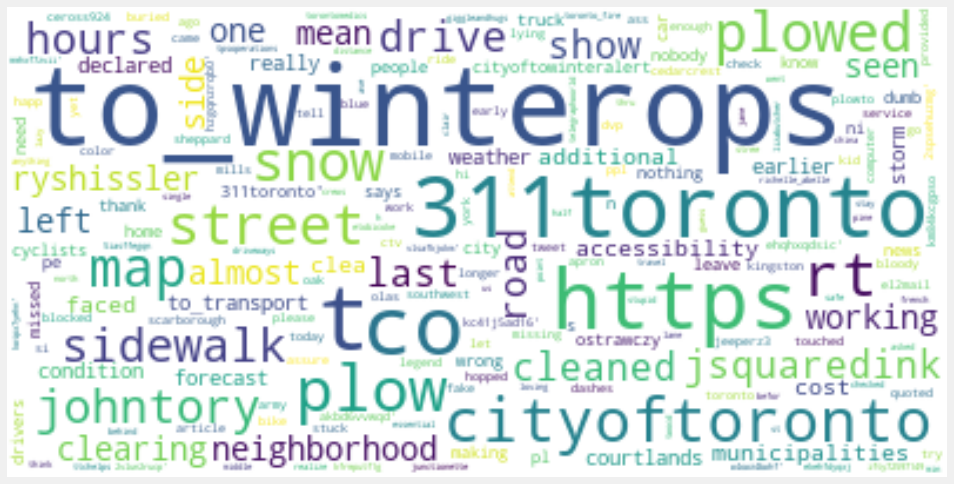

In [328]:
#a word cloud is generated to show the most frequently appearing words
jan = jan_storm_merge.dropna(how='all')
jan = jan[jan['final_polarity'] == 'Negative']
jan_text = str((jan['text'].values))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(jan_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

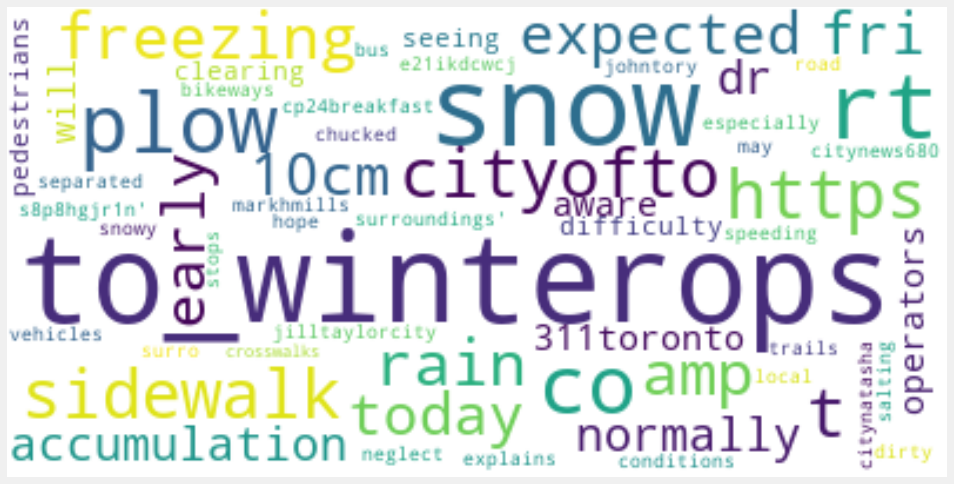

In [331]:
#word cloud for 2nd February storm
feb = feb_second_storm_merge.dropna(how='all')
feb = feb[feb['final_polarity'] == 'Negative']
feb_text = str((feb['text'].values))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=True).generate(feb_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()